In [35]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

project_home = '/Users/catcamacho/Box/SNAP/BABIES/quest_analysis/'
ibq_data = read_csv(project_home + 'ibq_fullsample.csv', index_col=None)
features=ibq_data.iloc[:,1:15]

fa = FactorAnalyzer()
fa.analyze(features,3,rotation='varimax', method='ml', normalize=True)
print(fa.get_factor_variance())

                 Factor1   Factor2   Factor3
SS Loadings     1.969824  1.987460  1.303459
Proportion Var  0.140702  0.141961  0.093104
Cumulative Var  0.140702  0.282663  0.375767


In [41]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3
sadness                 -0.089455  0.587655  0.167166
falling_reactivity      -0.007097 -0.614199  0.339792
low_intensity_pleasure   0.048660 -0.175408  0.711478
distress_to_limitations  0.063993  0.725501 -0.131597
fear                     0.071687  0.411146  0.190813
cuddliness               0.086696 -0.361157  0.163918
duration_of_orienting    0.111601 -0.008099  0.247517
activity_level           0.162667  0.399601 -0.007891
perceptual_sensitivity   0.235469  0.014255  0.538114
soothability             0.268053 -0.467861  0.203423
approach                 0.421965  0.000004  0.332568
vocal_reactivity         0.646175  0.133432  0.082473
high_intensity_pleasure  0.736986 -0.027632  0.205631
smiling_laughter         0.798557 -0.104286  0.145934


In [42]:
correlations = fa.corr

correlations

,activity_level,distress_to_limitations,fear,duration_of_orienting,smiling_laughter,high_intensity_pleasure,low_intensity_pleasure,soothability,falling_reactivity,cuddliness,perceptual_sensitivity,sadness,approach,vocal_reactivity
activity_level,1.000000,0.299469,0.116191,-0.068574,0.068053,0.073799,-0.057027,-0.212972,-0.246642,-0.321594,0.170679,0.094756,0.099042,0.228756
distress_to_limitations,0.299469,1.000000,0.269858,-0.036666,-0.106369,0.071641,-0.275833,-0.242431,-0.495083,-0.212038,-0.024776,0.473110,0.001961,0.105170
fear,0.116191,0.269858,1.000000,0.010649,0.075616,0.097007,0.077052,-0.170932,-0.136693,-0.157330,0.125184,0.339250,-0.048263,0.135757
duration_of_orienting,-0.068574,-0.036666,0.010649,1.000000,0.213483,0.065787,0.236422,-0.041264,0.036731,0.025554,0.131092,-0.008904,0.214388,0.032027
smiling_laughter,0.068053,-0.106369,0.075616,0.213483,1.000000,0.629256,0.159688,0.240183,0.074411,0.085493,0.266996,-0.115863,0.372567,0.528293
high_intensity_pleasure,0.073799,0.071641,0.097007,0.065787,0.629256,1.000000,0.196505,0.300407,0.124147,0.195176,0.231539,-0.020814,0.365616,0.477662
low_intensity_pleasure,-0.057027,-0.275833,0.077052,0.236422,0.159688,0.196505,1.000000,0.170812,0.330580,0.181153,0.389283,0.018484,0.243776,0.086180
soothability,-0.212972,-0.242431,-0.170932,-0.041264,0.240183,0.300407,0.170812,1.000000,0.469177,0.322204,0.207719,-0.241337,0.273499,0.119035
falling_reactivity,-0.246642,-0.495083,-0.136693,0.036731,0.074411,0.124147,0.330580,0.469177,1.000000,0.264590,0.188535,-0.265105,0.035874,-0.051590
cuddliness,-0.321594,-0.212038,-0.157330,0.025554,0.085493,0.195176,0.181153,0.322204,0.264590,1.000000,0.082185,-0.127794,0.091103,-0.006110


In [38]:
factor_scores = fa.get_scores(features)
ibq_data = ibq_data.join(factor_scores)
ibq_data.to_csv(project_home + 'ibq_fullsample_withfactors.csv')
ibq_data.head()

,ID,activity_level,distress_to_limitations,fear,duration_of_orienting,smiling_laughter,high_intensity_pleasure,low_intensity_pleasure,soothability,falling_reactivity,...,sadness,approach,vocal_reactivity,SUR,NEG,REG,age,Factor1,Factor2,Factor3
0,2,6.428571,5.857143,2.666667,4.666667,3.857143,5.571429,5.428571,4.571429,4.000000,...,6.333333,5.833333,5.571429,5.265873,4.714286,5.000000,4.829701,-0.447479,2.163225,-0.114471
1,3,6.571429,3.857143,3.333333,4.333333,6.428571,7.000000,6.714286,7.000000,5.166667,...,1.500000,7.000000,6.285714,6.797619,2.880952,6.220238,6.636732,1.684580,-0.408973,0.801066
2,7,3.857143,6.000000,2.833333,3.333333,4.000000,6.285714,4.571429,5.000000,4.000000,...,5.500000,5.833333,4.571429,5.230159,4.583333,4.684524,5.026832,-0.236998,1.613427,-0.362921
3,10,4.714286,4.571429,1.666667,3.500000,4.714286,5.857143,6.571429,4.571429,3.166667,...,3.000000,5.500000,5.857143,5.162698,3.517857,4.660714,6.111050,0.022782,0.948106,-0.438086
4,12,4.428571,4.142857,2.333333,4.166667,5.285714,7.000000,6.285714,6.571429,6.666667,...,3.333333,5.833333,3.000000,5.369048,2.785714,5.797619,6.406746,0.057225,-0.711978,0.812623


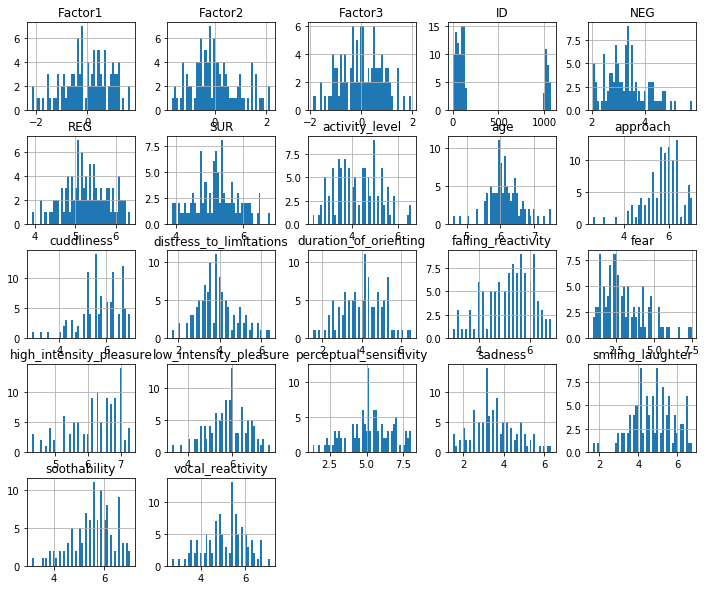

In [43]:
import matplotlib.pyplot as plt

ibq_data.hist(bins=50, figsize=(12,10))
plt.show()

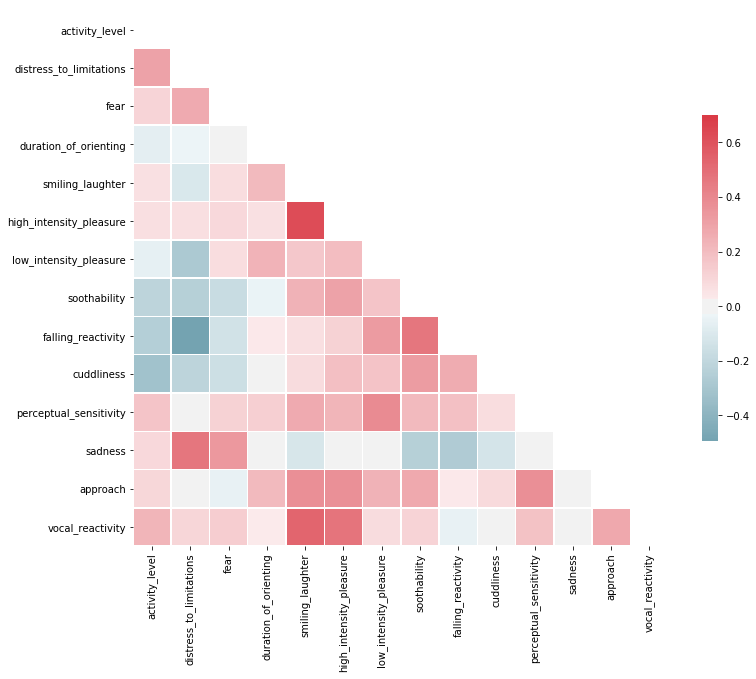

In [44]:
import seaborn as sns
from numpy import zeros_like, triu_indices_from, bool

mask = zeros_like(correlations, dtype=bool)
mask[triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(12,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig(project_home + 'ibq_corr_matrix.png')